<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class8/program01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLT 추적 알고리즘으로 물체 추적하기

In [1]:
import numpy as np
import cv2 as cv

from google.colab.patches import cv2_imshow

In [2]:
cap = cv.VideoCapture('/content/drive/MyDrive/컴퓨터비전/Class8/Lamborghini.gif')
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15,15), maxLevel=2, criteria=(cv.TERM_CRITERIA_EPS|cv.TERM_CRITERIA_COUNT, 10, 0.03))
color = np.random.randint(0, 255, (100,3))

In [3]:
ret, old_frame = cap.read() # 첫 프레임
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(old_frame) # 물체의 이동 궤적을 그릴 영상

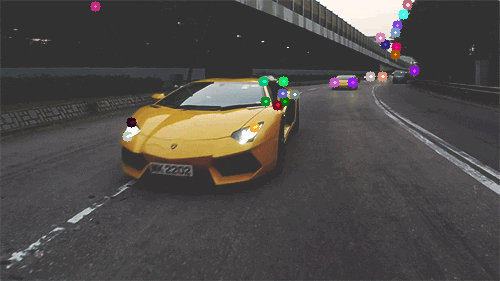

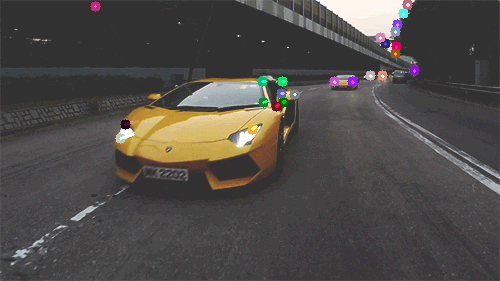

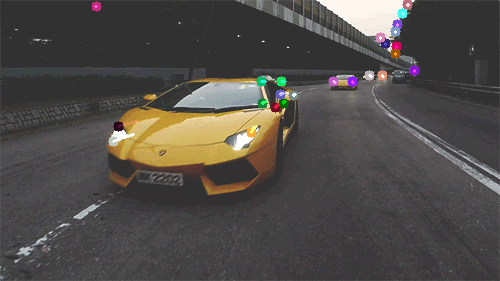

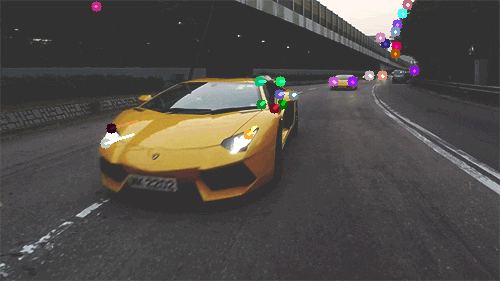

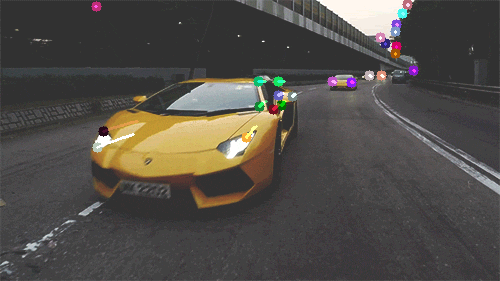

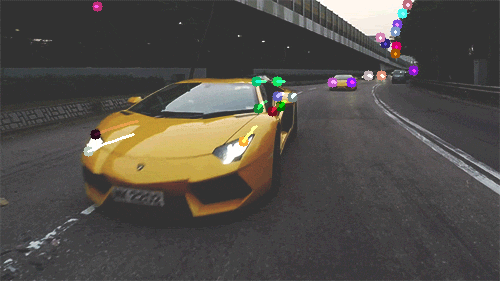

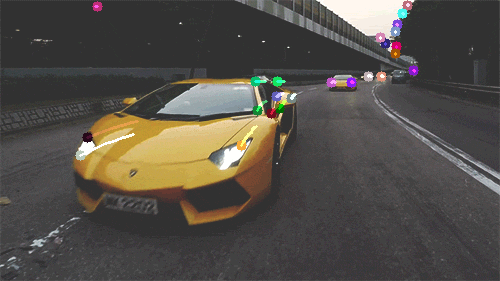

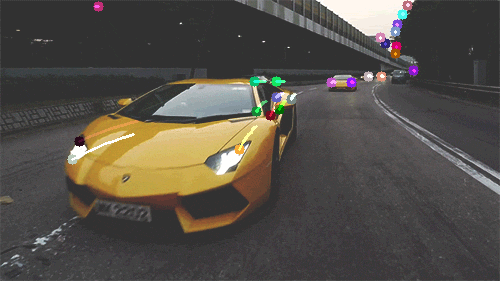

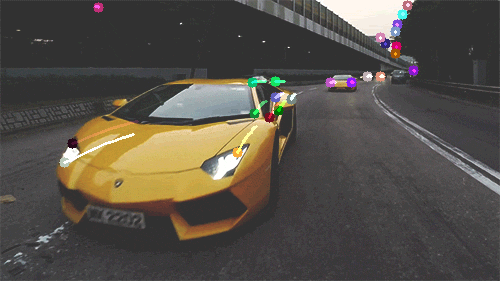

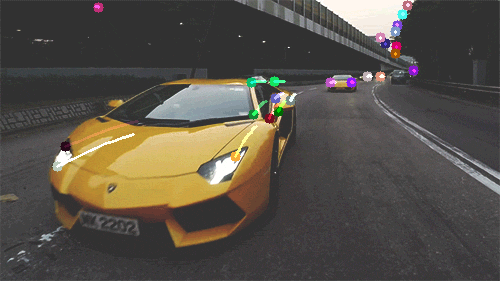

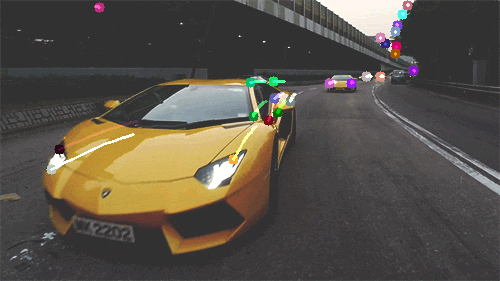

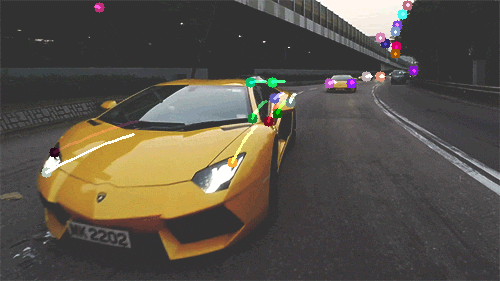

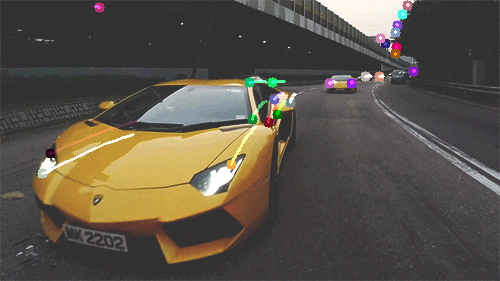

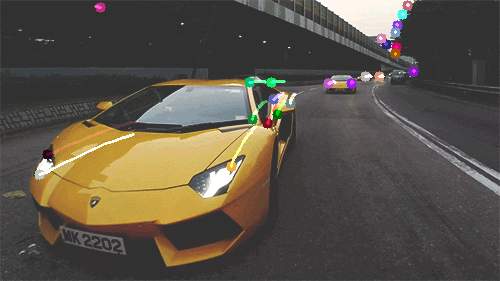

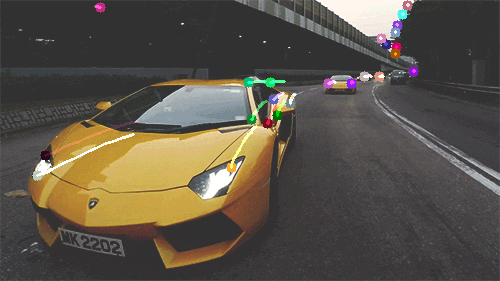

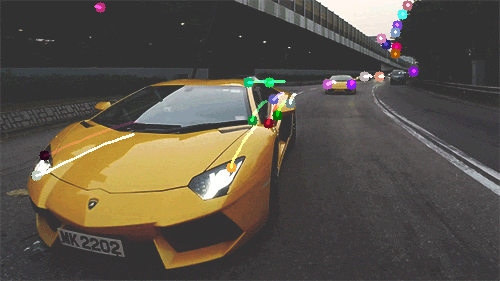

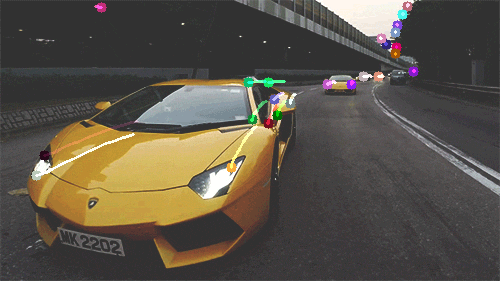

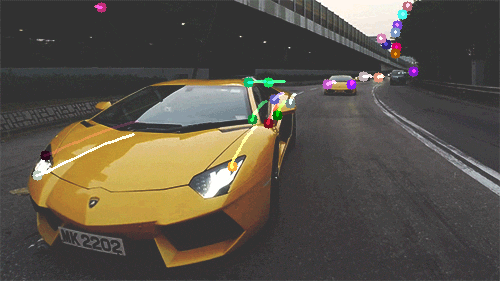

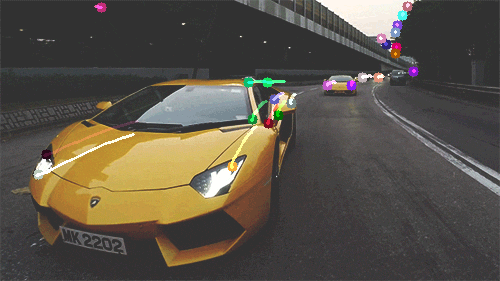

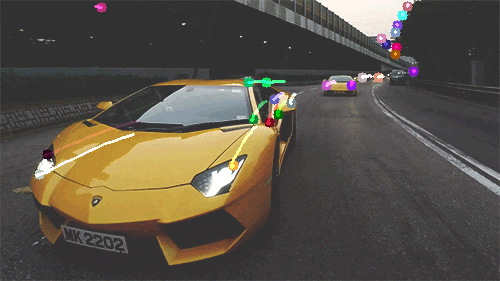

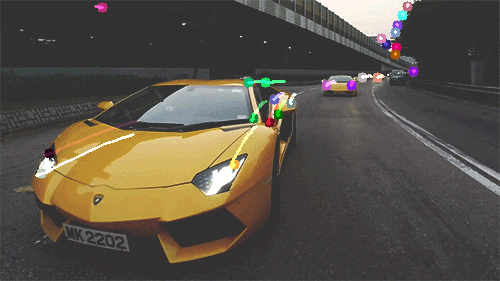

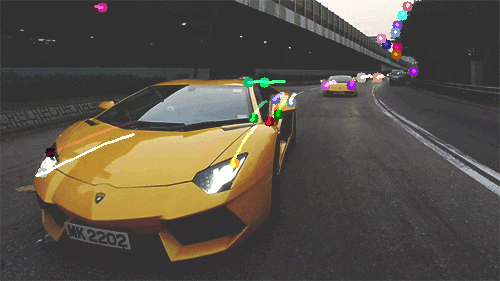

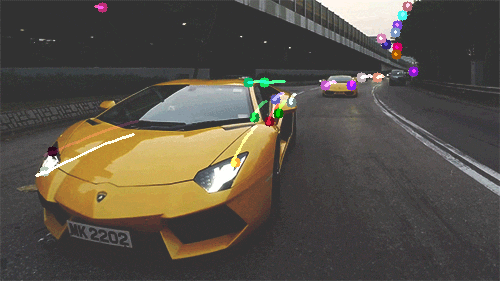

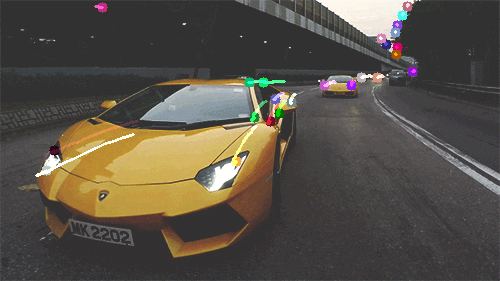

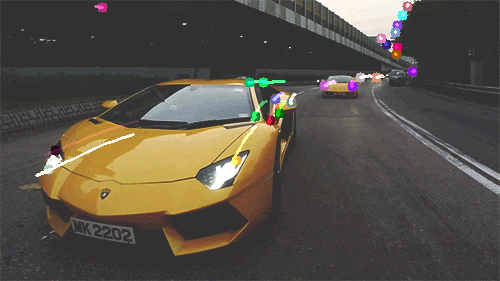

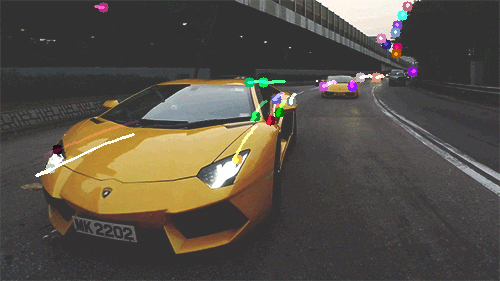

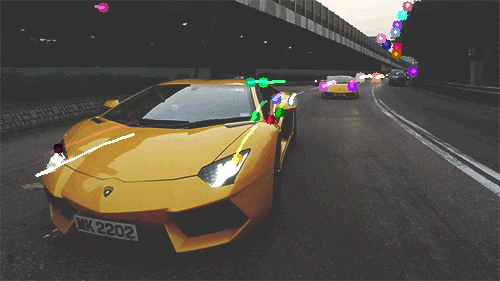

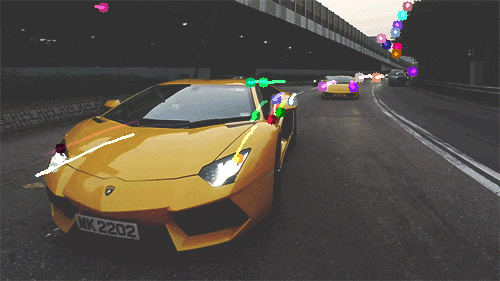

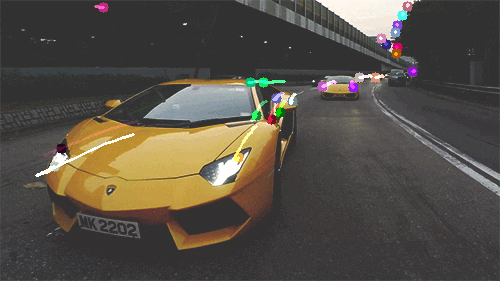

In [4]:
while(1):
  ret, frame = cap.read()
  if not ret: break

  new_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  p1, match, err = cv.calcOpticalFlowPyrLK(old_gray, new_gray, p0, None, **lk_params) # 광류 계산

  # 양호한 쌍 선택
  if p1 is not None:
    good_new = p1[match==1]
    good_old = p0[match==1]

  # 이동 궤적 그리기
  for i in range(len(good_new)):
    a, b = int(good_new[i][0]), int(good_new[i][1])
    c, d = int(good_old[i][0]), int(good_old[i][1])
    mask = cv.line(mask, (a,b), (c,d), color[i].tolist(), 2)
    frame = cv.circle(frame, (a,b), 5, color[i].tolist(), -1)

  img = cv.add(frame, mask)
  cv2_imshow(img)
  cv.waitKey(30)

  # 이번 것이 이전 것이 됨
  old_gray = new_gray.copy()
  p0 = good_new.reshape(-1,1,2)

cv.destroyAllWindows()